# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

Processing record 1 of set 0 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 2 of set 0 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 3 of set 0 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 4 of set 0 | semme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 5 of set 0 | rengali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 6 of set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 7 of set 0 | martil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record

Processing record 8 of set 1 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 9 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 10 of set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 11 of set 1 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
City not found!
Processing record 12 of set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 13 of set 1 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 14 of set 1 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb

Processing record 14 of set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 15 of set 2 | pucallpa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 16 of set 2 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 17 of set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 18 of set 2 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 19 of set 2 | yunjinghong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
City not found!
Processing record 20 of set 2 | slevik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0

Processing record 21 of set 3 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 22 of set 3 | moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 23 of set 3 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 24 of set 3 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 25 of set 3 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 26 of set 3 | linfen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 27 of set 3 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processi

Processing record 28 of set 4 | cutro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 29 of set 4 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 30 of set 4 | verkhoturye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 31 of set 4 | jishou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 32 of set 4 | williamsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 33 of set 4 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 34 of set 4 | bang saphan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e

Processing record 35 of set 5 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 36 of set 5 | gwadar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 37 of set 5 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 38 of set 5 | wukari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 39 of set 5 | eyrarbakki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 40 of set 5 | zlobin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 41 of set 5 | lykhivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processi

Processing record 42 of set 6 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 43 of set 6 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 44 of set 6 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 45 of set 6 | torbat-e jam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 46 of set 6 | nushki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 47 of set 6 | oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 48 of set 6 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Proc

Processing record 49 of set 7 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 50 of set 7 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 0 of set 8 | uribia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 1 of set 8 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 2 of set 8 | bainbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 3 of set 8 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 4 of set 8 | tanout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processin

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 6 of set 9 | disna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 7 of set 9 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 8 of set 9 | ambagarh chauki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 9 of set 9 | guazacapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 10 of set 9 | buariki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
City not found!
Processing record 11 of set 9 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 12 of set

Processing record 12 of set 10 | brindisi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 13 of set 10 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 14 of set 10 | zverinogolovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 15 of set 10 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 16 of set 10 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 17 of set 10 | grand island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 18 of set 10 | betioky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872

Processing record 18 of set 11 | libreville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 19 of set 11 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 20 of set 11 | curup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 21 of set 11 | miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 22 of set 11 | lisakovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 23 of set 11 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb2500725e
Processing record 24 of set 11 | lons-le-saunier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8499316b0f5e0f872b5a75eb25007

In [16]:
# Data Count
weather_df = {
    "City": new_cities,
    "Cloudiness (%)" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity (%)" : humidity,
    "Max Temp (F)": temp,
    "Latitude" : lat,
    "Longitude" : lng,   
    "Wind Speed (mph)" : wind
}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City                563
Cloudiness (%)      563
Country             563
Date                563
Humidity (%)        563
Max Temp (F)        563
Latitude            563
Longitude           563
Wind Speed (mph)    563
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Display DataFrame
weather_df.head(10)

,City,Cloudiness (%),Country,Date,Humidity (%),Max Temp (F),Latitude,Longitude,Wind Speed (mph)
0,luderitz,0,NA,1584036397,64,71.60,-26.65,15.16,18.34
1,victoria,40,HK,1584036351,94,71.60,22.29,114.16,13.87
2,carnarvon,100,AU,1584036143,69,80.60,-24.87,113.63,14.99
3,semme,75,FR,1584036398,93,48.99,46.20,1.50,9.17
4,rengali,33,IN,1584036398,67,75.20,21.63,84.05,4.25
5,cape town,13,ZA,1584036150,82,68.00,-33.93,18.42,9.17
6,martil,86,MA,1584036398,56,71.60,35.62,-5.28,5.82
7,arraial do cabo,40,BR,1584036398,69,82.40,-22.97,-42.03,12.75
8,rewari,40,IN,1584036398,64,68.00,28.18,76.62,4.70
9,saint-philippe,75,RE,1584036399,94,80.60,-21.36,55.77,6.93


In [53]:
#Export DataFrame to CSV File
weather_df.to_csv("../output_data/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [54]:
weather_df.dtypes

City                 object
Cloudiness (%)        int64
Country              object
Date                  int64
Humidity (%)          int64
Max Temp (F)        float64
Latitude            float64
Longitude           float64
Wind Speed (mph)    float64
dtype: object

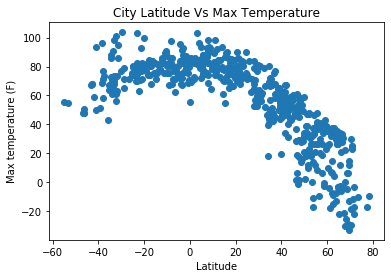

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max Temp (F)"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title("City Latitude Vs Max Temperature")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Images/LatitudeVsmaxtemp.png', dpi=100)

#### Latitude vs. Humidity Plot

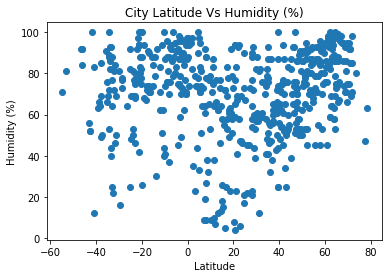

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity (%)"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude Vs Humidity (%)")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Images/LatitudeVshumidity.png', dpi=100)

#### Latitude vs. Cloudiness Plot

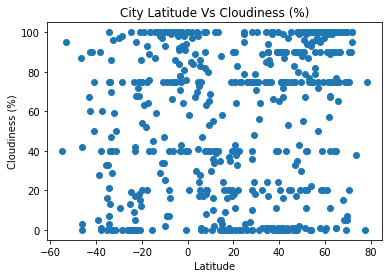

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness (%)"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude Vs Cloudiness (%)")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Images/LatitudeVscloudiness.png', dpi=100)

#### Latitude vs. Wind Speed Plot

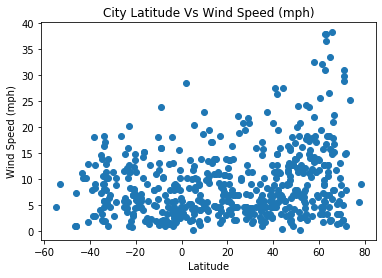

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed (mph)"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude Vs Wind Speed (mph)")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../Images/LatitudeVswind.png', dpi=100)

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [68]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[(weather_df.Latitude > 0)]
southern_df = weather_df[(weather_df.Latitude < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

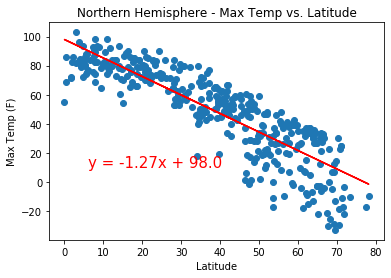

In [70]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

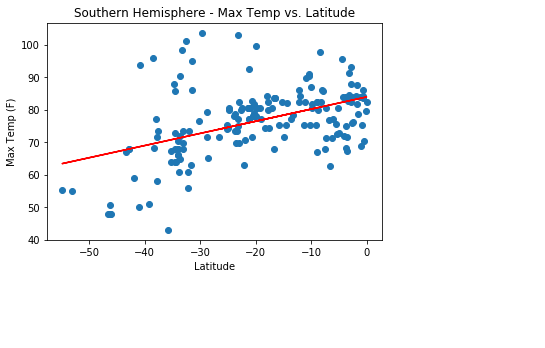

In [72]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

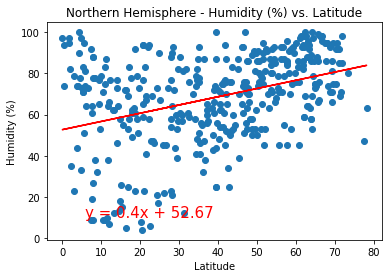

In [74]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

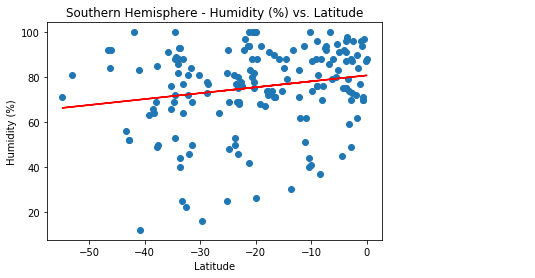

In [75]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

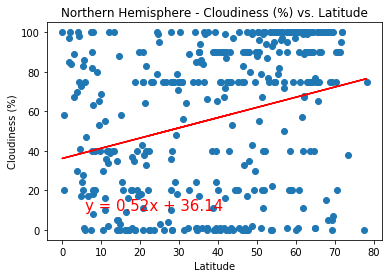

In [79]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

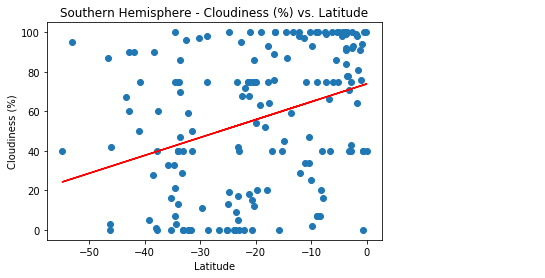

In [80]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

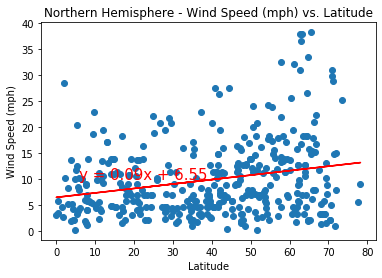

In [82]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

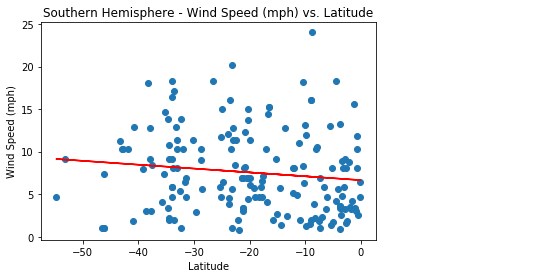

In [83]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()